<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/ASML_2_Project_Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='drive/MyDrive'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [ ]:
dftrain = pd.read_csv('train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape


(13096, 26)

In [ ]:
train = dftrain.copy()
valid = dfvalid.copy()

In [ ]:
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  13096 non-null  int64  
 1   time_cycles  13096 non-null  int64  
 2   setting_1    13096 non-null  float64
 3   setting_2    13096 non-null  float64
 4   setting_3    13096 non-null  float64
 5   s_1          13096 non-null  float64
 6   s_2          13096 non-null  float64
 7   s_3          13096 non-null  float64
 8   s_4          13096 non-null  float64
 9   s_5          13096 non-null  float64
 10  s_6          13096 non-null  float64
 11  s_7          13096 non-null  float64
 12  s_8          13096 non-null  float64
 13  s_9          13096 non-null  float64
 14  s_10         13096 non-null  float64
 15  s_11         13096 non-null  float64
 16  s_12         13096 non-null  float64
 17  s_13         13096 non-null  float64
 18  s_14         13096 non-null  float64
 19  s_15

In [ ]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (13096, 26)
Percentage of the validation dataset :  0.3882942449669404


In [ ]:
train.loc[:,['unit_number','time_cycles']].describe()

,unit_number,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [ ]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


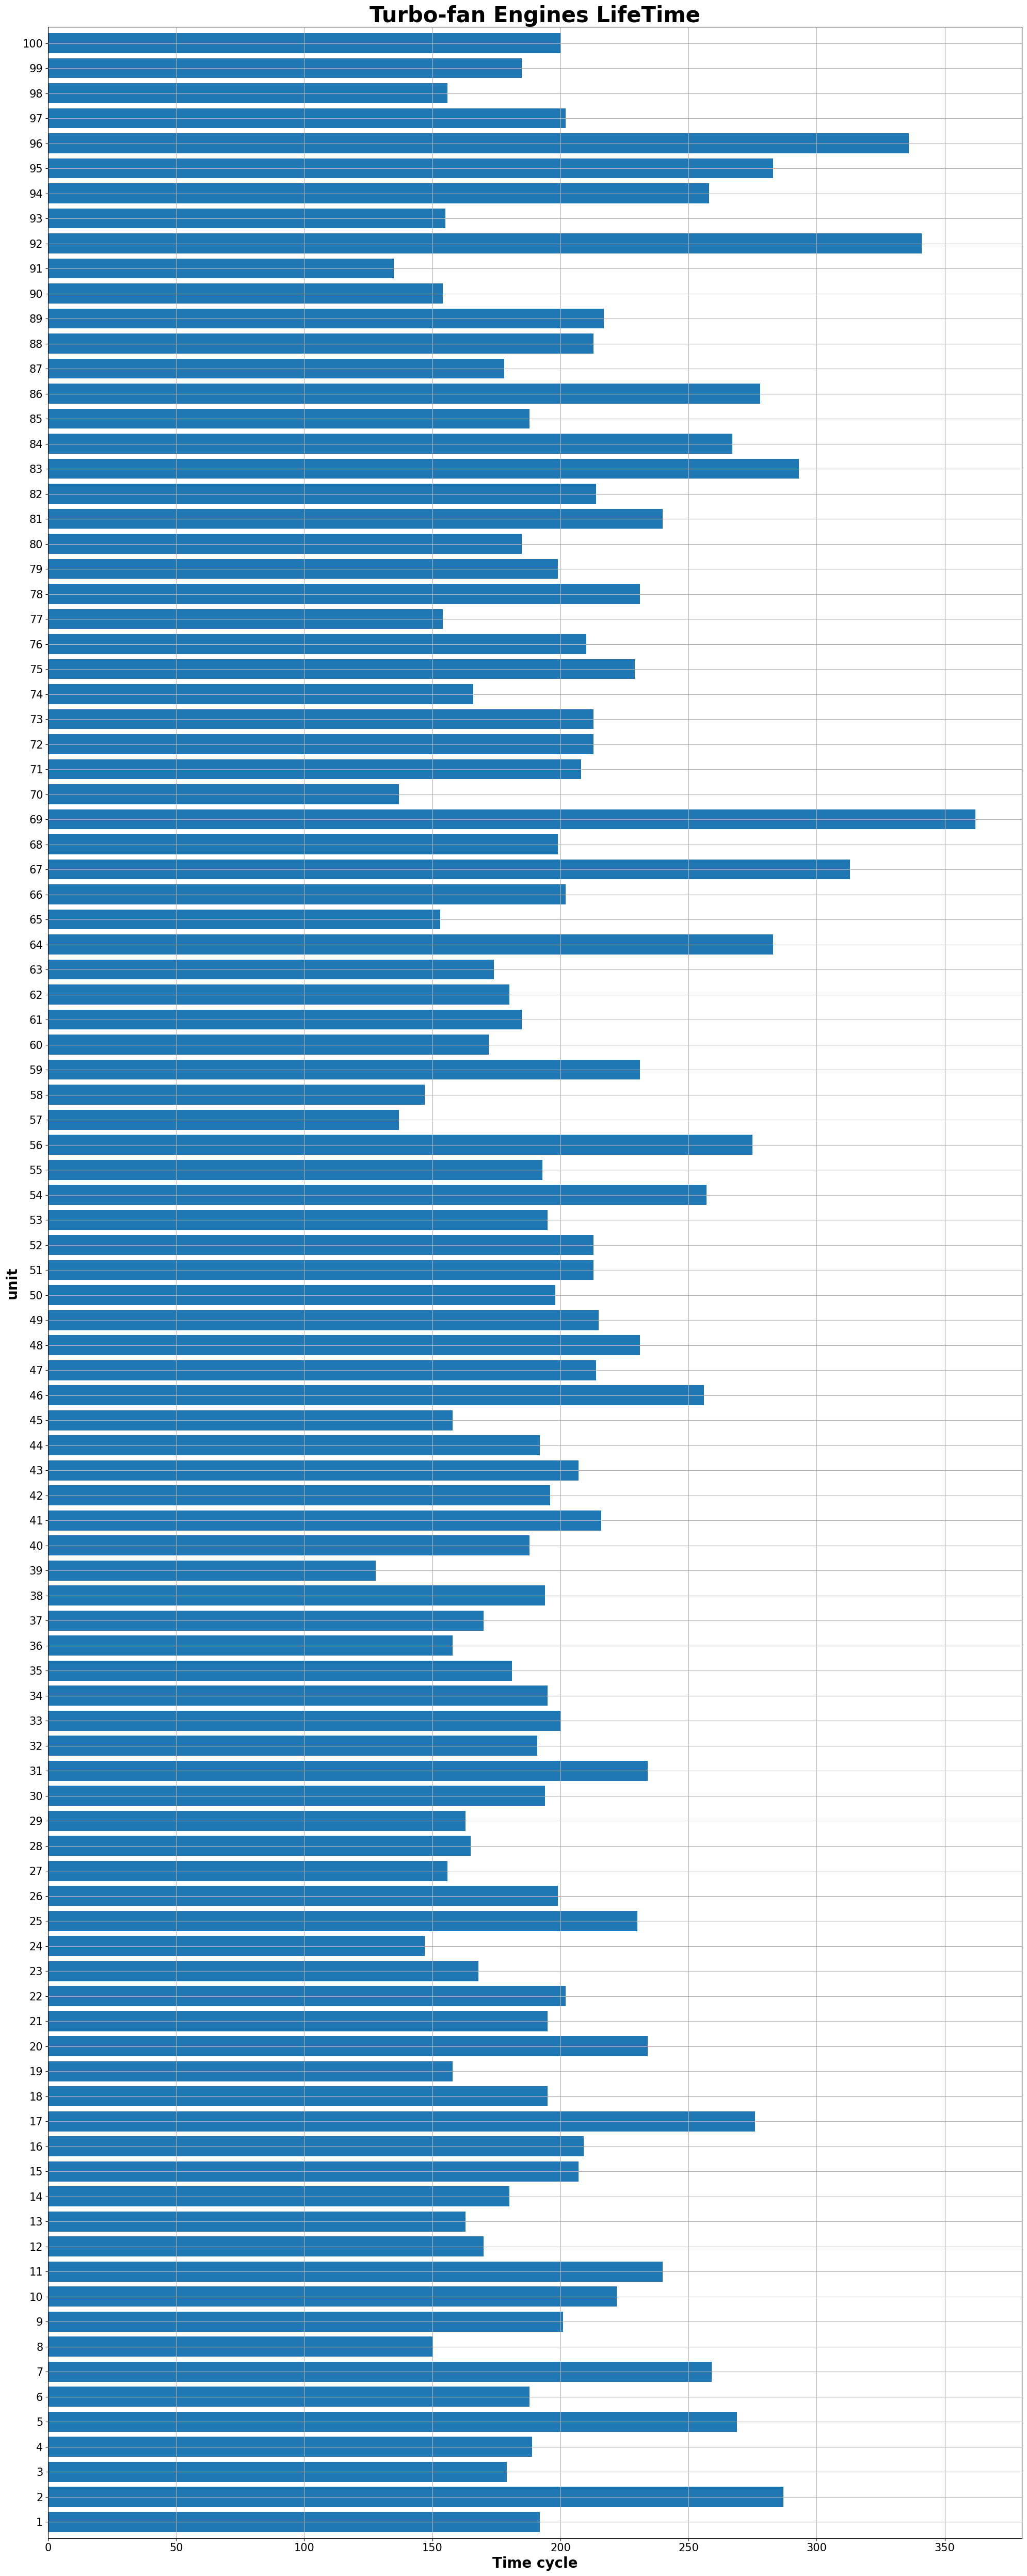

In [ ]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbo-fan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

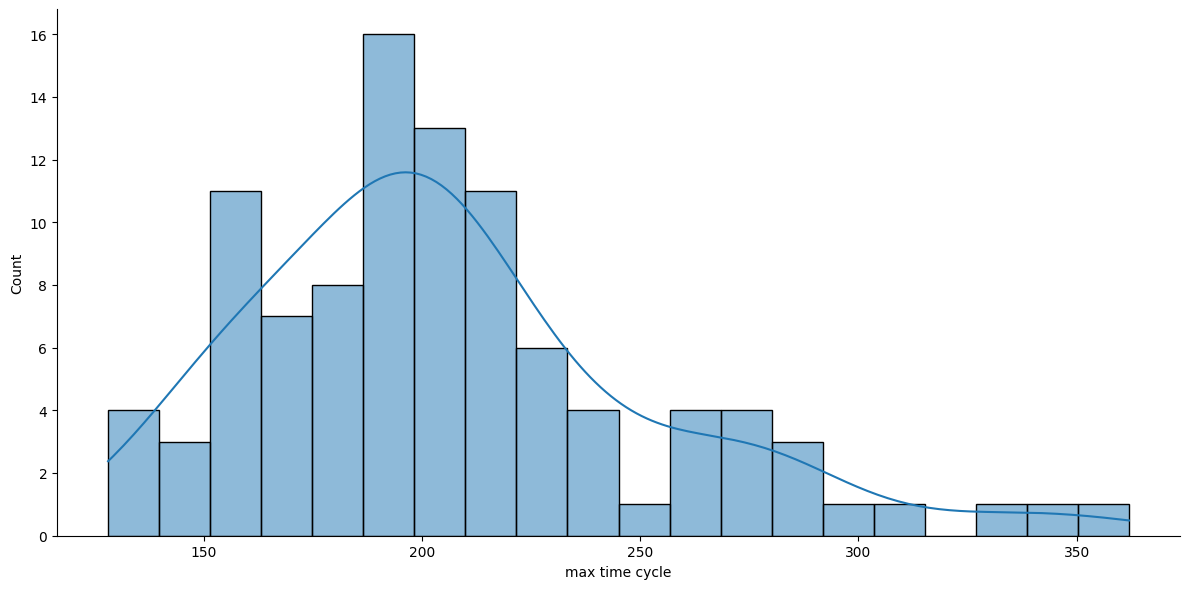

In [ ]:
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

Joining of RUL data


In [ ]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number') 
    max_time_cycles = train_grouped_by_unit['time_cycles'].max() 
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1) 
    return merged

In [ ]:
train = add_RUL_column(train)

In [ ]:
train[['unit_number','RUL']]


,unit_number,RUL
0,1,191
1,1,190
2,1,189
3,1,188
4,1,187
...,...,...
20626,100,4
20627,100,3
20628,100,2
20629,100,1


In [ ]:
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,192,0.0047,0.0005,100.0,518.67,644.21,1605.44,1432.52,14.62,...,2388.35,8140.58,8.5227,0.03,398,2388,100.0,39.18,23.4999,191
1,2,287,0.0076,0.0006,100.0,518.67,643.94,1610.10,1431.17,14.62,...,2388.26,8175.57,8.5377,0.03,398,2388,100.0,39.24,23.6005,286
2,3,179,0.0058,0.0005,100.0,518.67,643.93,1606.50,1438.51,14.62,...,2388.20,8255.34,8.5363,0.03,399,2388,100.0,39.23,23.5181,178
3,4,189,0.0059,0.0006,100.0,518.67,644.53,1612.11,1434.12,14.62,...,2388.17,8259.42,8.5462,0.03,399,2388,100.0,39.21,23.5074,188
4,5,269,0.0055,0.0005,100.0,518.67,644.02,1609.41,1434.59,14.62,...,2388.23,8215.19,8.5410,0.03,398,2388,100.0,39.29,23.5503,268


Discovering Co-relation

In [ ]:
corr = train.corr()

In [ ]:
import numpy as np

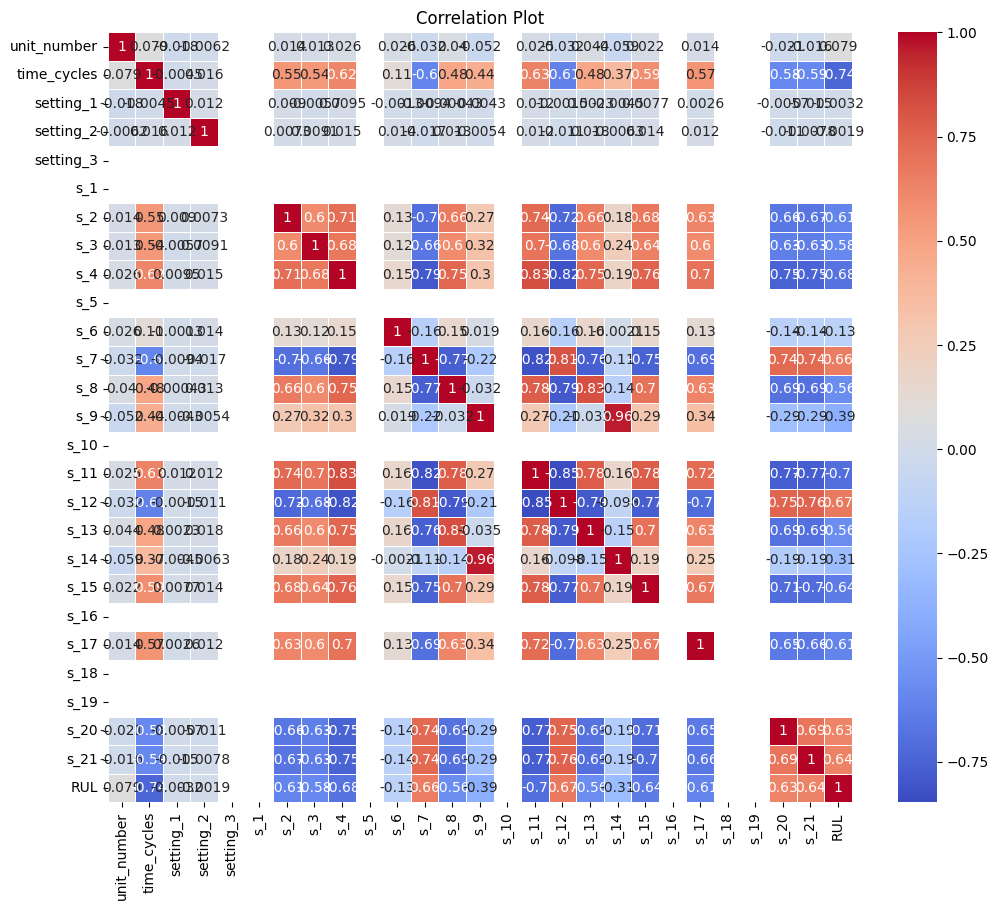

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show();

In [ ]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
mutual_info=mutual_info_regression

In [ ]:
X = train.drop(['RUL'], axis=1)
y = train['RUL']

In [ ]:
mutual_info= mutual_info_regression(X, y)

In [ ]:
for i in range(len(X.columns)):
    print('Feature {}: MUTUAL_INFO = {}'.format(X.columns[i], mutual_info[i]))

Feature unit_number: MUTUAL_INFO = 0.0
Feature time_cycles: MUTUAL_INFO = 0.8823990641893049
Feature setting_1: MUTUAL_INFO = 0.0005748756885157746
Feature setting_2: MUTUAL_INFO = 0.0025867991562158466
Feature setting_3: MUTUAL_INFO = 0.0
Feature s_1: MUTUAL_INFO = 0.0
Feature s_2: MUTUAL_INFO = 0.33859223992085496
Feature s_3: MUTUAL_INFO = 0.3058532781958716
Feature s_4: MUTUAL_INFO = 0.4664361209444712
Feature s_5: MUTUAL_INFO = 0.0030090694311923905
Feature s_6: MUTUAL_INFO = 0.017684659898699273
Feature s_7: MUTUAL_INFO = 0.42487283971137657
Feature s_8: MUTUAL_INFO = 0.25378064523990673
Feature s_9: MUTUAL_INFO = 0.2209518134318431
Feature s_10: MUTUAL_INFO = 0.004429816942251197
Feature s_11: MUTUAL_INFO = 0.5044355924870967
Feature s_12: MUTUAL_INFO = 0.4378308578381169
Feature s_13: MUTUAL_INFO = 0.2732792096462928
Feature s_14: MUTUAL_INFO = 0.2218228128201103
Feature s_15: MUTUAL_INFO = 0.3901147385291477
Feature s_16: MUTUAL_INFO = 0.0019617377089038435
Feature s_17: MUTUA

In [ ]:
# Higher the value the more dependent  is the value on RUL

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

time_cycles    0.882399
s_11           0.504436
s_4            0.466436
s_12           0.437831
s_7            0.424873
s_15           0.390115
s_21           0.380247
s_20           0.367087
s_2            0.338592
s_17           0.319837
s_3            0.305853
s_13           0.273279
s_8            0.253781
s_14           0.221823
s_9            0.220952
s_6            0.017685
s_10           0.004430
s_5            0.003009
setting_2      0.002587
s_16           0.001962
setting_1      0.000575
s_1            0.000000
setting_3      0.000000
s_18           0.000000
s_19           0.000000
unit_number    0.000000
dtype: float64

<Axes: >

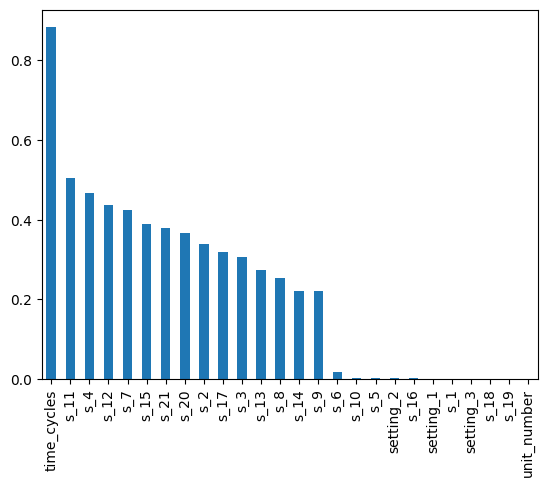

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar()

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
#Selecting top 20 percentile

In [ ]:
selected_top_columns=SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X,y)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f2a55026200>)

In [ ]:
selected_top_columns.get_support()

array([False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False])

In [ ]:
X.columns[selected_top_columns.get_support()]

Index(['time_cycles', 's_4', 's_7', 's_11', 's_12'], dtype='object')